In [94]:
import pandas as pd

In [122]:
df = pd.read_csv('AmesHousing.csv')

In [123]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [124]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [125]:
df = df.dropna(axis=1)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order            2930 non-null   int64 
 1   PID              2930 non-null   int64 
 2   MS SubClass      2930 non-null   int64 
 3   MS Zoning        2930 non-null   object
 4   Lot Area         2930 non-null   int64 
 5   Street           2930 non-null   object
 6   Lot Shape        2930 non-null   object
 7   Land Contour     2930 non-null   object
 8   Utilities        2930 non-null   object
 9   Lot Config       2930 non-null   object
 10  Land Slope       2930 non-null   object
 11  Neighborhood     2930 non-null   object
 12  Condition 1      2930 non-null   object
 13  Condition 2      2930 non-null   object
 14  Bldg Type        2930 non-null   object
 15  House Style      2930 non-null   object
 16  Overall Qual     2930 non-null   int64 
 17  Overall Cond     2930 non-null   

In [129]:
from sklearn.preprocessing import LabelEncoder

In [176]:
label = LabelEncoder()

In [177]:
x_categorical = df.select_dtypes(include=['object']).apply(label.fit_transform)

In [178]:
y = df['SalePrice']

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.20)

In [181]:
model = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)

In [182]:
reg = model.fit(x_train,y_train)

In [183]:
reg

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=42)

In [184]:
y_pred = reg.predict(x_test)

In [185]:
from sklearn.metrics import mean_absolute_error, r2_score

In [187]:
mse =  mean_absolute_error(y_test, y_pred)

In [188]:
mse

371.4457337883958

In [189]:
r2_score = r2_score(y_test, y_pred)

In [190]:
r2_score

0.9995922602084851

In [191]:
import matplotlib.pyplot as plt

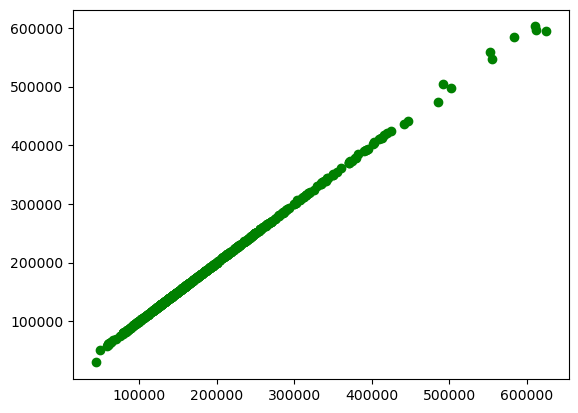

In [192]:
plt.scatter(y_test, y_pred, color='g')